# Data Manipulation
---

In [1]:
# loading libraries
library(tidyverse)
library(nycflights13)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


---
## Exercise 1
Spreading the data frame fails because there are two rows with "age" for "Phillip Woods". If we added another column with an indicator for the number observation it is, the code will work.

In [2]:
people <- tribble(
  ~name,             ~key,    ~value, ~obs,
  #-----------------|--------|------|------
  "Phillip Woods",   "age",       45, 1,
  "Phillip Woods",   "height",   186, 1,
  "Phillip Woods",   "age",       50, 2,
  "Jessica Cordero", "age",       37, 1,
  "Jessica Cordero", "height",   156, 1
)
spread(people, key, value)

name,obs,age,height
Jessica Cordero,1,37,156
Phillip Woods,1,45,186
Phillip Woods,2,50,NA


---
## Exercise 2
we need to use `gather()`. The variables in this data are

* `sex` ("female", "male")
* `pregnant` ("yes", "no")
* `count`, which is representing the number of observations.

The observations in this data are unique combinations of sex and pregnancy status.

In [3]:
preg <- tribble(
  ~pregnant, ~male, ~female,
  "yes",     NA,    10,
  "no",      20,    12
)

preg %>%
  gather(male, female, key = "sex", value = "count")

pregnant,sex,count
yes,male,NA
no,male,20
yes,female,10
no,female,12


To avoid printing the NA for "yes", "male" combination we can use `na.rm = TRUE param`.

Since this missing value is due to structural reasons it's ok to remove it...

In [4]:
preg %>%
  gather(male, female, key = "sex", value = "count", na.rm = TRUE)

,pregnant,sex,count
2,no,male,20
3,yes,female,10
4,no,female,12


---
## Exercise 3

In [5]:
diamonds %>%
  count(carat, cut, color, clarity, depth, table, x, y, z, price) %>%
  filter(n > 1) %>%
  head

carat,cut,color,clarity,depth,table,x,y,z,price,n
0.3,Good,J,VS1,63.4,57,4.23,4.26,2.69,394,2
0.3,Very Good,G,VS2,63.0,55,4.29,4.31,2.71,526,2
0.3,Very Good,J,VS1,63.4,57,4.26,4.23,2.69,506,2
0.3,Premium,D,SI1,62.2,58,4.31,4.28,2.67,709,2
0.3,Ideal,G,VS2,63.0,55,4.31,4.29,2.71,675,2
0.3,Ideal,G,IF,62.1,55,4.32,4.35,2.69,863,2


Even if grouped by all the variables we still see that there are groups with more than one record. We have duplicates. We can also draw the same conclusion by checking the number of rows and number of unique records:

In [6]:
nrow(diamonds)

[1] 53940

In [7]:
nrow(unique(diamonds))

[1] 53794

We could instead use a row number to distinguish between records:

In [8]:
diamonds %>%
  mutate(row_n = row_number()) %>%
  print()

# A tibble: 53,940 x 11
   carat cut       color clarity depth table price     x     y     z row_n
   <dbl> <ord>     <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl> <int>
 1 0.23  Ideal     E     SI2      61.5    55   326  3.95  3.98  2.43     1
 2 0.21  Premium   E     SI1      59.8    61   326  3.89  3.84  2.31     2
 3 0.23  Good      E     VS1      56.9    65   327  4.05  4.07  2.31     3
 4 0.290 Premium   I     VS2      62.4    58   334  4.2   4.23  2.63     4
 5 0.31  Good      J     SI2      63.3    58   335  4.34  4.35  2.75     5
 6 0.24  Very Good J     VVS2     62.8    57   336  3.94  3.96  2.48     6
 7 0.24  Very Good I     VVS1     62.3    57   336  3.95  3.98  2.47     7
 8 0.26  Very Good H     SI1      61.9    55   337  4.07  4.11  2.53     8
 9 0.22  Fair      E     VS2      65.1    61   337  3.87  3.78  2.49     9
10 0.23  Very Good H     VS1      59.4    61   338  4     4.05  2.39    10
# ... with 53,930 more rows


---
## Exercise 4

In [9]:
airport_locations <- airports %>%
  select(faa, lat, lon)

flights %>%
  select(year:day, hour, origin, dest) %>%
  left_join(airport_locations, by = c("origin" = "faa")) %>%
  left_join(airport_locations, by = c("dest" = "faa")) %>%
  print

# A tibble: 336,776 x 10
    year month   day  hour origin dest  lat.x lon.x lat.y lon.y
   <int> <int> <int> <dbl> <chr>  <chr> <dbl> <dbl> <dbl> <dbl>
 1  2013     1     1     5 EWR    IAH    40.7 -74.2  30.0 -95.3
 2  2013     1     1     5 LGA    IAH    40.8 -73.9  30.0 -95.3
 3  2013     1     1     5 JFK    MIA    40.6 -73.8  25.8 -80.3
 4  2013     1     1     5 JFK    BQN    40.6 -73.8  NA    NA  
 5  2013     1     1     6 LGA    ATL    40.8 -73.9  33.6 -84.4
 6  2013     1     1     5 EWR    ORD    40.7 -74.2  42.0 -87.9
 7  2013     1     1     6 EWR    FLL    40.7 -74.2  26.1 -80.2
 8  2013     1     1     6 LGA    IAD    40.8 -73.9  38.9 -77.5
 9  2013     1     1     6 JFK    MCO    40.6 -73.8  28.4 -81.3
10  2013     1     1     6 LGA    ORD    40.8 -73.9  42.0 -87.9
# ... with 336,766 more rows


This default can be overridden using the `suffix` argument:

In [10]:
flights %>%
  select(year:day, hour, origin, dest) %>%
  left_join(airport_locations, by = c("origin" = "faa")) %>%
  left_join(airport_locations, by = c("dest" = "faa"),
           suffix = c("_origin", "_dest")) %>%
  print

# A tibble: 336,776 x 10
    year month   day  hour origin dest  lat_origin lon_origin lat_dest lon_dest
   <int> <int> <int> <dbl> <chr>  <chr>      <dbl>      <dbl>    <dbl>    <dbl>
 1  2013     1     1     5 EWR    IAH         40.7      -74.2     30.0    -95.3
 2  2013     1     1     5 LGA    IAH         40.8      -73.9     30.0    -95.3
 3  2013     1     1     5 JFK    MIA         40.6      -73.8     25.8    -80.3
 4  2013     1     1     5 JFK    BQN         40.6      -73.8     NA       NA  
 5  2013     1     1     6 LGA    ATL         40.8      -73.9     33.6    -84.4
 6  2013     1     1     5 EWR    ORD         40.7      -74.2     42.0    -87.9
 7  2013     1     1     6 EWR    FLL         40.7      -74.2     26.1    -80.2
 8  2013     1     1     6 LGA    IAD         40.8      -73.9     38.9    -77.5
 9  2013     1     1     6 JFK    MCO         40.6      -73.8     28.4    -81.3
10  2013     1     1     6 LGA    ORD         40.8      -73.9     42.0    -87.9
# ... with 336,

---
## Exercise 5


Attaching package: ‘maps’

The following object is masked from ‘package:purrr’:

    map



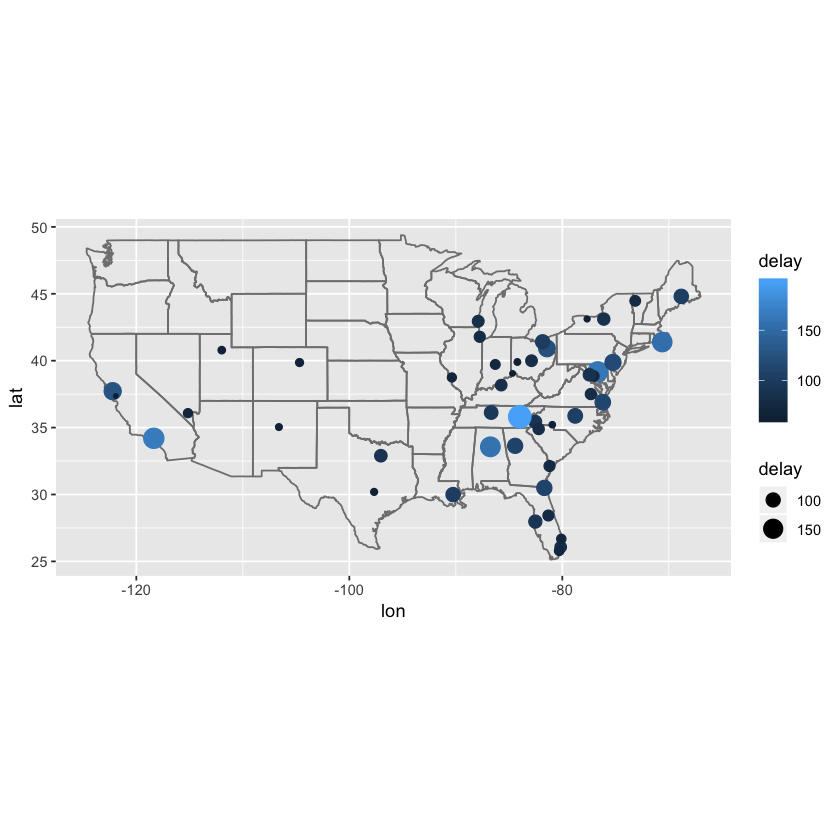

In [11]:
flights %>%
  filter(year == 2013, month == 6, day == 13) %>%  # June 13 2013
  group_by(dest) %>%
  summarise(delay = mean(arr_delay, na.rm = TRUE)) %>%
  inner_join(airports, by = c("dest" = "faa")) %>% 
  filter(lon < 0 & between(lat, 25, 50)) %>%  # limiting the map to US mainland boarders for clarity
  filter(delay > 60) %>%  # only destinations with delays more than one hour
  ggplot(aes(y = lat, x = lon, size = delay, color = delay)) +
    borders("state") + 
    geom_point() +
    coord_quickmap()

Looks like there were significant delays on the East Coast and South West. Here is what happened on that day: https://en.wikipedia.org/wiki/June_12%E2%80%9313,_2013_derecho_series

We can also map the percentage of the flights that were canceled per destination, we see a similar pattern:

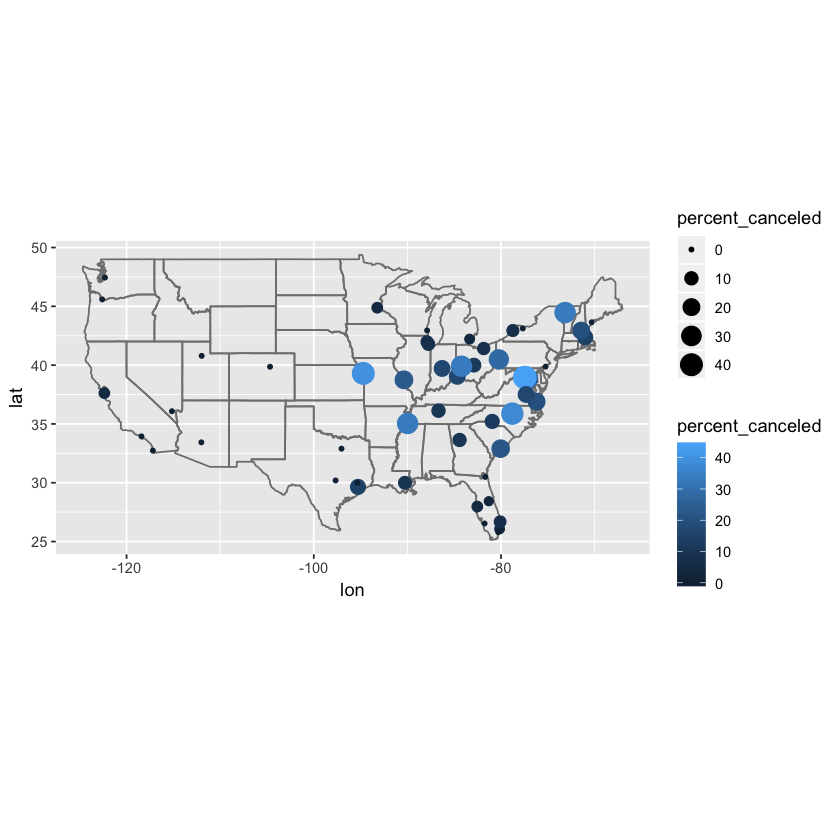

In [12]:
flights %>%
  filter(year == 2013, month == 6, day == 13) %>%  # June 13 2013
  group_by(dest) %>%
  summarize(percent_canceled = sum(is.na(dep_delay))/n() * 100,
           n = n()) %>%
  filter(n >= 5) %>%  # keeping destinations that at least had 5 flights from NYC that day
  inner_join(airports, by = c("dest" = "faa")) %>% 
  filter(lon < 0 & between(lat, 25, 50)) %>%  # limiting the map to US mainland boarders for clarity
  ggplot(aes(y = lat, x = lon, size = percent_canceled, color = percent_canceled)) +
    borders("state") + 
    geom_point() +
    coord_quickmap()

---
## Exercise 6
American Airlines (AA) and Envoy Airlines (MQ) don't report tail numbers.

In [13]:
flights %>%
  anti_join(planes, by = "tailnum") %>%
  count(carrier, sort = TRUE)

carrier,n
MQ,25397
AA,22558
UA,1693
9E,1044
B6,830
US,699
FL,187
DL,110
F9,50
WN,38


---
## Exercise 7

In [14]:
planes_w_over_100 <- flights %>%
  group_by(tailnum) %>%
  count() %>%
  filter(n > 100)

In [15]:
flights %>%
  semi_join(planes_w_over_100, by = "tailnum") %>%
  print

# A tibble: 229,202 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      544            545        -1     1004           1022
 4  2013     1     1      554            558        -4      740            728
 5  2013     1     1      555            600        -5      913            854
 6  2013     1     1      557            600        -3      709            723
 7  2013     1     1      557            600        -3      838            846
 8  2013     1     1      558            600        -2      849            851
 9  2013     1     1      558            600        -2      853            856
10  2013     1     1      558            600        -2      923            937
# ... with 229,192 more row

---
## Exercise 8
* `anti_join(flights, airports, by = c("dest" = "faa"))` are flights that go to an airport that is not in FAA list of destinations, likely foreign airports.

* `anti_join(airports, flights, by = c("faa" = "dest"))` are US airports that don't have a flight in the data, meaning that there were no flights to that airport from New York in 2013.